In [1]:
import statsrat as sr
from statsrat.expr.predef.oc_renewal_iti import oc_renewal
from extn_rw_models import *
from plotnine import *

In [2]:
model = cfg2
#model = refined
save_plots = True
print(model.pars)

par_vals = {'cfg2': [0.05, 5],
            'refined': [0.001, 0.2, 1.5, 5.0]}

            min   max  default
lrate       0.0   1.0      0.2
resp_scale  0.0  10.0      1.0


In [3]:
print('occasion setting renewal \n')

trials = oc_renewal.make_trials('different')
ds_diff = model.simulate(trials, par_vals[model.name])

trials = oc_renewal.make_trials('same')
ds_same = model.simulate(trials, par_vals[model.name])

print(oc_renewal.oats['renewal'].compute_total({'different': ds_diff, 'same': ds_same}))
print(oc_renewal.oats['renewal'].mean_resp({'different': ds_diff, 'same': ds_same}))

occasion setting renewal 

0.046439645215276326
    schedule      trial_name u_name  mean_resp
0  different  cs1 -> nothing     us    0.58072
0       same  cs1 -> nothing     us    0.53428


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_oc_renewal_b_cfg2.jpeg


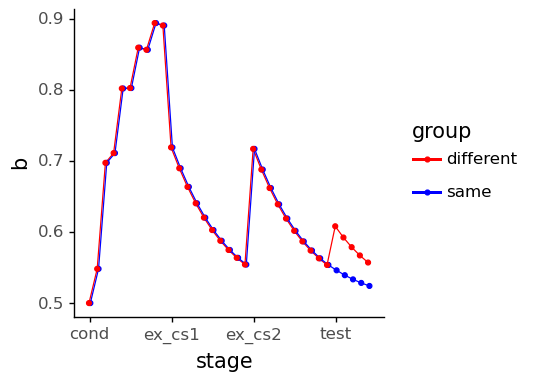

In [4]:
plot_b = sr.multi_plot(ds_list = [ds_diff, ds_same],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       only_main = True,
                       draw_points = True,
                       dodge_width = 2.0)
plot_b += scale_color_manual(values = {'different': 'red', 'same': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_oc_renewal_b_' + model.name + '.jpeg', dpi = 500)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/positions/position.py:204: PlotnineWarning: position_dodge requires non-overlapping x intervals
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_oc_renewal_w_cfg2.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/positions/position.py:204: PlotnineWarning: position_dodge requires non-overlapping x intervals


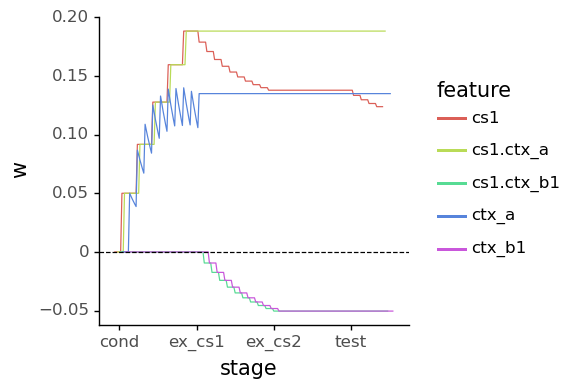

In [5]:
plot_w = sr.learn_plot(ds_diff,
                       var = 'w',
                       rename_coords = {'f_name': 'feature'},
                       sel = {'f_name': ['cs1', 'cs1.ctx_b1', 'ctx_b1', 'cs1.ctx_a', 'ctx_a']},
                       dodge_width = 10.0)
plot_w += geom_hline(yintercept = 0, linetype = "dashed")
plot_w.draw()
if save_plots:
    plot_w.save(filename = 'plots/rw_oc_renewal_w_' + model.name + '.jpeg', dpi = 500)